# Probability Density Function
## Univariate normal distribution

-  a univariate distribution is a probability distribution of only one random variable. This is in contrast to a multivariate distribution, the probability distribution of a random vector (consisting of multiple random variables).

-  the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f"/>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Univariate normal distribution
def N(x,M,S):
    pdf=(1/np.sqrt(2*np.pi*S**2))*np.exp(-np.power((x-M),2)/(2*S**2))
    return pdf/pdf.sum()
x=np.arange(-10,10,0.1)

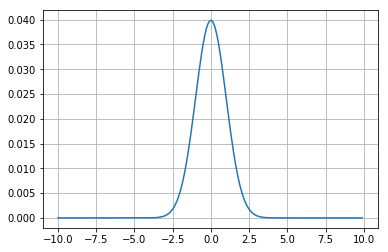

In [3]:
M,S=0,1
pdf=N(x,M,S)
plt.grid()
plt.plot(x,pdf)

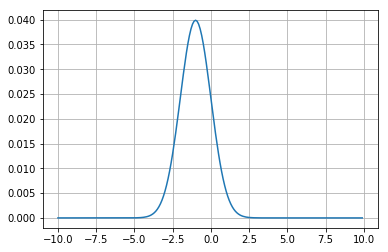

In [4]:
M,S=-1,1
pdf=N(x,M,S)
plt.grid()
plt.plot(x,pdf)

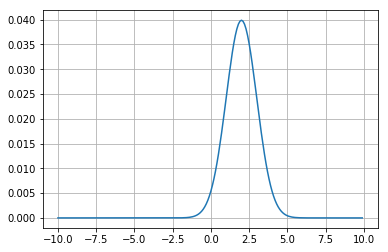

In [5]:
M,S=2,1
pdf=N(x,M,S)
plt.grid()
plt.plot(x,pdf)

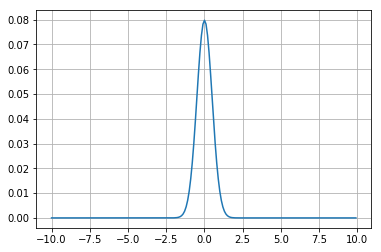

In [6]:
M,S=0,0.5
pdf=N(x,M,S)
plt.grid()
plt.plot(x,pdf)

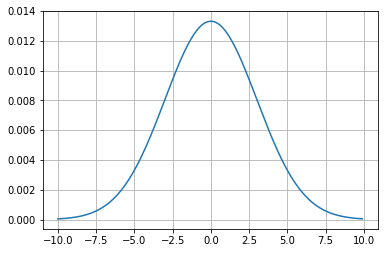

In [7]:
M,S=0,3
pdf=N(x,M,S)
plt.grid()
plt.plot(x,pdf)

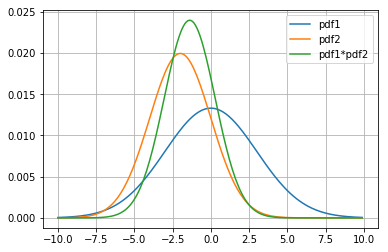

In [8]:
M1,S1=0,3
M2,S2=-2,2
pdf1=N(x,M1,S1)
pdf2=N(x,M2,S2)
pdf3=np.multiply(pdf1,pdf2)
pdf3=pdf3/pdf3.sum()
plt.figure()
plt.grid()
plt.plot(x,pdf1)
plt.plot(x,pdf2)
plt.plot(x,pdf3)
plt.legend(['pdf1','pdf2','pdf1*pdf2'])